In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('bmh')

In [2]:
df_dostavka = pd.read_excel(r'd:\Работа ВВЮ\DataScience\Final project\Dostavka.xlsx')

In [3]:
df_dostavka.head()

,Торговое предприятие,Категория блюда,Блюдо,Время открытия,Номер чека,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн."
0,EmDoma,Бізнес-ланч,Бізнес-ланч №1,2021-01-04 12:18:59,14755,1.0,190.0,61.590
1,EmDoma,Бізнес-ланч,Бізнес-ланч №1,2021-01-05 12:19:03,94211,2.0,280.0,123.950
2,EmDoma,Бізнес-ланч,Бізнес-ланч №1,2021-01-05 13:53:22,14781,3.0,420.0,185.925
3,EmDoma,Бізнес-ланч,Бізнес-ланч №1,2021-01-05 15:50:49,37840,1.0,140.0,61.975
4,EmDoma,Бізнес-ланч,Бізнес-ланч №1,2021-01-06 10:16:24,73807,1.0,0.0,62.100


In [4]:
df_dostavka.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43413 entries, 0 to 43412
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Торговое предприятие    43413 non-null  object        
 1   Категория блюда         43413 non-null  object        
 2   Блюдо                   43413 non-null  object        
 3   Время открытия          43413 non-null  datetime64[ns]
 4   Номер чека              43413 non-null  int64         
 5   Количество блюд         43413 non-null  float64       
 6   Сумма со скидкой, грн.  43413 non-null  float64       
 7   Себестоимость, грн.     43413 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 2.6+ MB


In [5]:
df_dostavka.describe()

,Номер чека,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн."
count,43413.000000,43413.000000,43413.000000,43413.000000
mean,40125.081888,1.261143,186.166530,68.190923
std,28189.339989,0.702587,192.314733,68.604375
min,9.000000,0.000000,0.000000,0.000000
25%,17625.000000,1.000000,76.640000,30.370000
50%,27228.000000,1.000000,140.000000,54.380000
75%,63822.000000,1.000000,220.000000,74.290000
max,99993.000000,16.000000,3600.000000,1219.140000


In [6]:
df_dostavka.isnull().sum()

Торговое предприятие      0
Категория блюда           0
Блюдо                     0
Время открытия            0
Номер чека                0
Количество блюд           0
Сумма со скидкой, грн.    0
Себестоимость, грн.       0
dtype: int64

 ## Группировка по категориям

In [7]:
df_group = df_dostavka.groupby(['Категория блюда'])['Количество блюд', 'Сумма со скидкой, грн.', 'Себестоимость, грн.'].sum()

<ipython-input-7-37c4e5e9d64e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_group = df_dostavka.groupby(['Категория блюда'])['Количество блюд', 'Сумма со скидкой, грн.', 'Себестоимость, грн.'].sum()


In [8]:
df_group.reset_index()
df_group_sort=df_group.sort_values('Сумма со скидкой, грн.', ascending=[False])
df_group_sort

,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн."
Категория блюда,,,
Роли,19714.0,2912224.97,940767.304667
Набори,2456.0,1846709.08,716085.860000
Піца,5025.0,602221.20,242339.101667
Кухня,3972.0,512202.01,182689.740000
Бізнес-ланч,3720.0,504131.56,230755.336667
Салати,3720.0,360280.46,134021.630000
Страви з рису та локшини,3205.0,316693.25,107581.820000
Супи,4054.0,285413.79,106504.232045
Бургери,1257.0,199553.49,75035.820000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

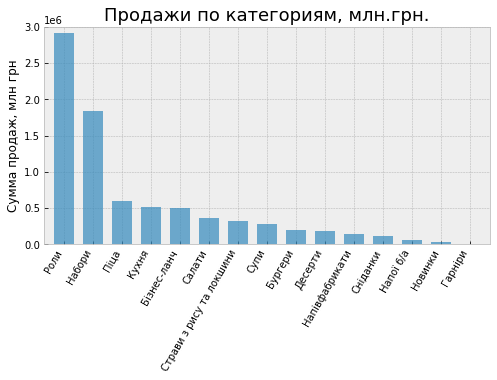

In [51]:
fig, ax = plt.subplots(figsize = (8,4))

ax.vlines(x=df_group_sort.index, ymin = 0, ymax=df_group_sort['Сумма со скидкой, грн.'], alpha=0.7, linewidth=20 )

ax.set_title('Продажи по категориям, млн.грн.', fontdict={'size':18})
ax.set(ylabel='Сумма продаж, млн грн', ylim=(0, 3000000))
plt.xticks( rotation=60, horizontalalignment='right')

[Text(0.5, 0, 'Дата')]

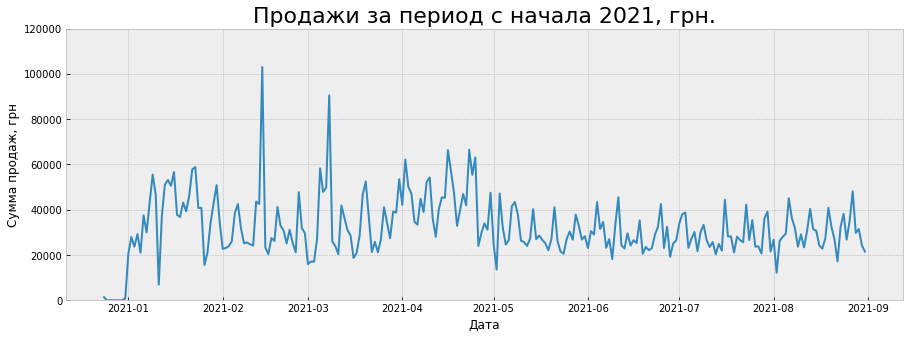

In [10]:
df__sort=df_dostavka.sort_values('Время открытия', ascending=[True])
df_daily=df__sort.groupby(pd.Grouper(key='Время открытия', freq='1D')).sum()

fig, ax = plt.subplots(figsize = (15,5))
ax.plot(df_daily['Сумма со скидкой, грн.'])

ax.set_title('Продажи за период с начала 2021, грн.', fontdict={'size':22})
ax.set(ylabel='Сумма продаж, грн', ylim=(0, 120000))
ax.set(xlabel='Дата')

## Выделяем крупнейшую категорию

In [11]:
df_dostavka_rol=df_dostavka.loc[df_dostavka['Категория блюда'] == 'Роли']
#df_dostavka_rol = df_dostavka_rol[df_dostavka_rol['Время открытия'] > '2021-05-01']
df_dostavka_rol

,Торговое предприятие,Категория блюда,Блюдо,Время открытия,Номер чека,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн."
19070,EmDoma,Роли,Гарячий рол з лососем та манго,2021-01-02 18:24:53,60918,1.0,160.00,56.7400
19071,EmDoma,Роли,Гарячий рол з лососем та манго,2021-01-04 14:03:10,14759,1.0,160.00,56.7700
19072,EmDoma,Роли,Гарячий рол з лососем та манго,2021-01-05 18:02:42,14790,1.0,160.00,56.9700
19073,EmDoma,Роли,Гарячий рол з лососем та манго,2021-01-05 19:59:32,14795,1.0,160.00,56.9700
19074,EmDoma,Роли,Гарячий рол з лососем та манго,2021-01-06 19:29:05,31908,1.0,156.25,58.5000
...,...,...,...,...,...,...,...,...
34008,EmDoma,Роли,Хосомакі зі свіжим лососем,2021-08-27 20:22:12,22406,1.0,53.67,21.4725
34009,EmDoma,Роли,Хосомакі зі свіжим лососем,2021-08-27 20:27:28,22407,1.0,65.72,21.4725
34010,EmDoma,Роли,Хосомакі зі свіжим лососем,2021-08-29 17:03:14,33385,1.0,75.00,21.7000
34011,EmDoma,Роли,Хосомакі зі свіжим лососем,2021-08-29 20:32:15,22470,1.0,53.09,21.7000


[Text(0.5, 0, 'Дата')]

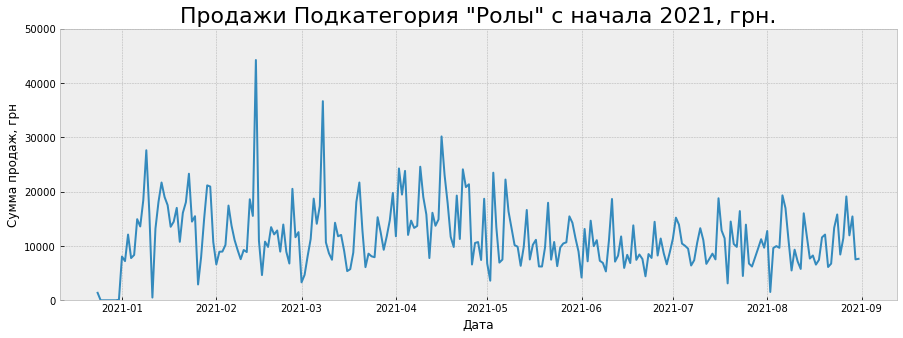

In [12]:
df_rol_daily=df_dostavka_rol.groupby(pd.Grouper(key='Время открытия', freq='1D')).sum()

fig, ax = plt.subplots(figsize = (15,5))
ax.plot(df_rol_daily['Сумма со скидкой, грн.'])

ax.set_title('Продажи Подкатегория "Ролы" с начала 2021, грн.', fontdict={'size':22})
ax.set(ylabel='Сумма продаж, грн', ylim=(0, 50000))
ax.set(xlabel='Дата')

In [13]:
df_group_sort['Маржа, %'] = round(df_group_sort['Сумма со скидкой, грн.'] / df_group_sort['Себестоимость, грн.'] * 100, 2)
df_group_sort

,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн.","Маржа, %"
Категория блюда,,,,
Роли,19714.0,2912224.97,940767.304667,309.56
Набори,2456.0,1846709.08,716085.860000,257.89
Піца,5025.0,602221.20,242339.101667,248.50
Кухня,3972.0,512202.01,182689.740000,280.37
Бізнес-ланч,3720.0,504131.56,230755.336667,218.47
Салати,3720.0,360280.46,134021.630000,268.82
Страви з рису та локшини,3205.0,316693.25,107581.820000,294.37
Супи,4054.0,285413.79,106504.232045,267.98
Бургери,1257.0,199553.49,75035.820000,265.94


<ipython-input-52-e00be7a1cc60>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(m_ticks, rotation = 50, horizontalalignment='right')


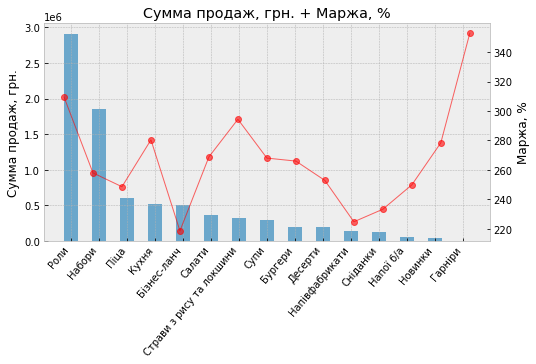

In [52]:
fig=plt.figure(figsize = (8,4))

ax1=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

ax1.bar(df_group_sort.index, df_group_sort['Сумма со скидкой, грн.'], alpha=0.7, linewidth=15, width = 0.5)
ax1.set_ylabel("Сумма продаж, грн.")

m_ticks=[]
for el in df_group_sort.index:
    m_ticks.append(el)
    
#ax1.set_xticks(m_ticks)
ax1.set_xticklabels(m_ticks, rotation = 50, horizontalalignment='right')
ax1.set_title('Сумма продаж, грн. + Маржа, %')

ax2.plot(df_group_sort.index, df_group_sort['Маржа, %'], 'r',linewidth = 1, marker = 'o', alpha=0.6)
ax2.yaxis.tick_right()
ax2.grid(b=False)
ax2.set_xticks([])
ax2.set_ylabel("Маржа, %")
ax2.yaxis.set_label_position('right')

## Группировка по времени

### Группировка по дню недели

In [15]:
df_dostavka_group_weekday=df_dostavka.groupby(df_dostavka['Время открытия'].dt.weekday).sum()
df_dostavka_group_weekday.reset_index()
df_dostavka_group_weekday

,Номер чека,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн."
Время открытия,,,,
0,217644428,6855.0,982853.61,362093.637062
1,221858972,6680.0,959104.85,357037.346696
2,221795080,7256.0,989078.14,366879.023421
3,245134028,7636.0,1077176.65,398492.031241
4,325322277,10053.0,1558949.28,568556.697968
5,260769528,8264.0,1307513.26,472338.018826
6,249425867,8006.0,1207371.79,434975.789832


[Text(0.5, 0, 'День недели')]

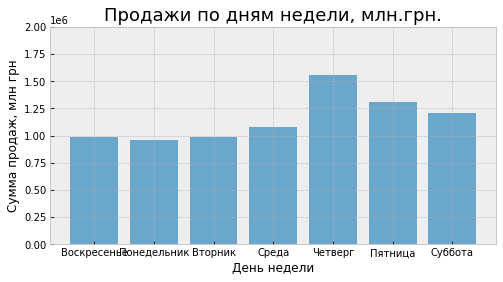

In [54]:
fig, ax = plt.subplots(figsize = (8,4))

xticks1 = ['Воскресенье','Понедельник','Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота']


plt.bar(df_dostavka_group_weekday.index, df_dostavka_group_weekday['Сумма со скидкой, грн.'], tick_label = xticks1, alpha=0.7, linewidth=10)
ax.set_title('Продажи по дням недели, млн.грн.', fontdict={'size':18})
ax.set(ylabel='Сумма продаж, млн грн', ylim=(0, 2000000))
ax.set(xlabel='День недели')

## Группировка по месяцам

In [17]:
df_dostavka_group_month = df_dostavka[df_dostavka['Время открытия'] >= '2021-01-01'].groupby(df_dostavka['Время открытия'].dt.month).sum()
df_dostavka_group_month

,Номер чека,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн."
Время открытия,,,,
1,236981124,8199.0,1190987.45,434125.682167
2,200275847,6320.0,911674.58,329158.467545
3,212630422,6815.0,1065613.78,381504.680714
4,280590965,9165.0,1338487.49,497176.971500
5,202750911,6327.0,911269.32,336962.637286
6,189379323,5584.0,846567.98,307181.056833
7,203056385,6047.0,890456.88,327889.805333
8,216154733,6284.0,924710.10,345612.917500


[Text(0.5, 0, 'Номер месяца')]

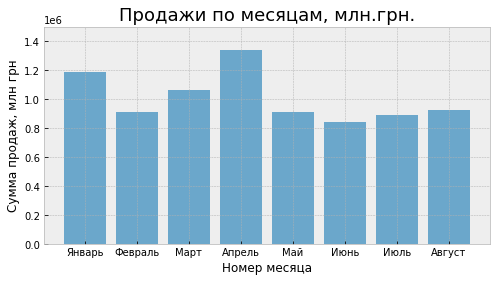

In [55]:
fig, ax = plt.subplots(figsize = (8,4))
xticks2 = ['Январь','Февраль','Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август' ]
plt.bar(df_dostavka_group_month.index, df_dostavka_group_month['Сумма со скидкой, грн.'], tick_label = xticks2, alpha=0.7, linewidth=10)
ax.set_title('Продажи по месяцам, млн.грн.', fontdict={'size':18})
ax.set(ylabel='Сумма продаж, млн грн', ylim=(0, 1500000))
ax.set(xlabel='Номер месяца')

### Группировка по номеру недели

In [19]:
df_dostavka = df_dostavka[df_dostavka['Время открытия'] >= '2021-01-01']
df_dostavka_group_week=df_dostavka.groupby(df_dostavka['Время открытия'].dt.isocalendar().week).sum()
df_dostavka_group_week

,Номер чека,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн."
week,,,,
1,55097114,1707.0,263000.09,93687.515000
2,52377264,1994.0,293055.58,109208.923222
3,64181829,2338.0,322865.83,120675.044278
4,50172637,1655.0,239831.34,85255.615833
5,48076438,1517.0,208592.23,79078.421667
6,58727434,1814.0,288745.37,103202.638333
7,47854300,1493.0,202362.87,73092.691389
8,45617675,1496.0,211974.11,73784.716157
9,42445206,1426.0,233072.29,82656.363503


[Text(0.5, 0, 'Номер недели')]

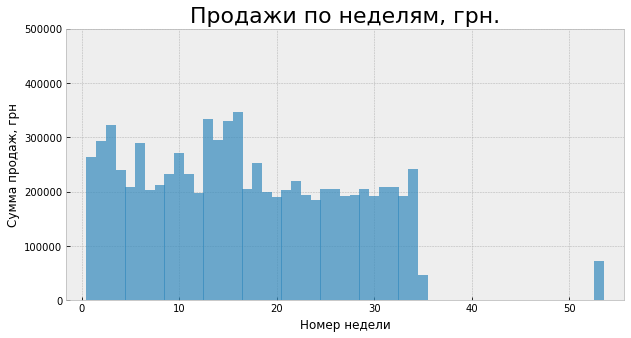

In [20]:
fig, ax = plt.subplots(figsize = (10,5))

ax.vlines(x = df_dostavka_group_week.index, ymin = 0, ymax=df_dostavka_group_week['Сумма со скидкой, грн.'], alpha=0.7, linewidth=10)

ax.set_title('Продажи по неделям, грн.', fontdict={'size':22})
ax.set(ylabel='Сумма продаж, грн', ylim=(0, 500000))
ax.set(xlabel='Номер недели')

In [21]:
df_dostavka_group_week['Correct_week'] = df_dostavka_group_week.index + 1
df_dostavka_group_week.loc[53, 'Correct_week'] = 1
df_dostavka_group_week

,Номер чека,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн.",Correct_week
week,,,,,
1,55097114,1707.0,263000.09,93687.515000,2
2,52377264,1994.0,293055.58,109208.923222,3
3,64181829,2338.0,322865.83,120675.044278,4
4,50172637,1655.0,239831.34,85255.615833,5
5,48076438,1517.0,208592.23,79078.421667,6
6,58727434,1814.0,288745.37,103202.638333,7
7,47854300,1493.0,202362.87,73092.691389,8
8,45617675,1496.0,211974.11,73784.716157,9
9,42445206,1426.0,233072.29,82656.363503,10


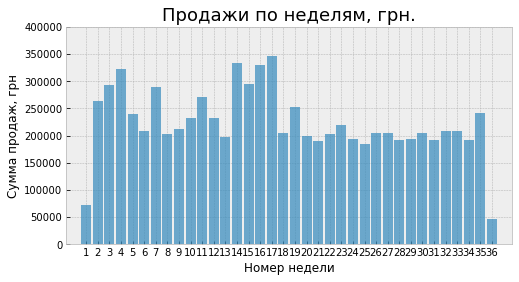

In [57]:
fig, ax = plt.subplots(figsize = (8,4))

ax.vlines(x = df_dostavka_group_week['Correct_week'], ymin = 0, ymax=df_dostavka_group_week['Сумма со скидкой, грн.'], alpha=0.7, linewidth=10)

ax.set_title('Продажи по неделям, грн.', fontdict={'size':18})
ax.set(ylabel='Сумма продаж, грн', ylim=(0, 400000))
ax.set(xlabel='Номер недели')

m_ticks = []
for el in df_dostavka_group_week['Correct_week']:
    m_ticks.append(el)
ax.set_xticks(m_ticks)
ax.grid(True)

### Группировка по часу суток

In [23]:
df_dostavka_group_hour = df_dostavka.groupby(df_dostavka['Время открытия'].dt.hour).sum()
df_dostavka_group_hour

,Номер чека,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн."
Время открытия,,,,
9,20702278,634.0,110275.88,42275.668680
10,86466496,2807.0,417007.45,155840.285563
11,135269731,4055.0,584953.88,219071.198795
12,160215951,4959.0,692472.43,263842.374311
13,166544132,4904.0,686087.73,258612.273127
14,132088490,4128.0,620426.37,229782.268247
15,131173591,4117.0,628645.61,232069.249275
16,127471862,4276.0,670198.94,239887.864386
17,175957698,5578.0,889148.48,316781.458017


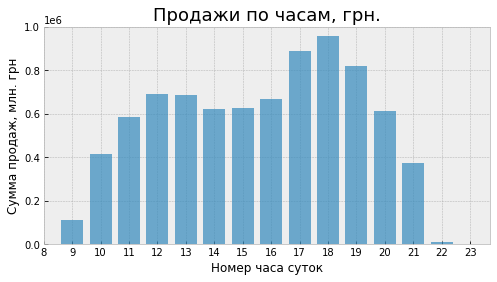

In [58]:
fig, ax = plt.subplots(figsize = (8,4))

ax.vlines(x = df_dostavka_group_hour.index, ymin = 0, ymax=df_dostavka_group_hour['Сумма со скидкой, грн.'], alpha=0.7, linewidth=22)

ax.set_title('Продажи по часам, грн.', fontdict={'size':18})
ax.set(ylabel='Сумма продаж, млн. грн', ylim=(0, 1000000))
ax.set(xlabel='Номер часа суток')

m_ticks = np.arange(8, 24, 1)
ax.set_xticks(m_ticks)
ax.grid(True)

### Времянной ряд

In [25]:
df_d_sort=df_dostavka.sort_values('Время открытия', ascending=[True])
df_d_sort

,Торговое предприятие,Категория блюда,Блюдо,Время открытия,Номер чека,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн."
9825,EmDoma,Набори,Набір Філадельфія,2021-01-01 12:06:05,14671,1.0,688.00,225.090
3628,EmDoma,Бургери,Бургер з рваною яловичиною,2021-01-01 12:24:18,10506,1.0,147.00,55.100
22740,EmDoma,Роли,Рол Гарячий дракон,2021-01-01 12:24:18,10506,1.0,209.00,73.695
29066,EmDoma,Роли,Рол Філ. Delux з хіяші,2021-01-01 12:24:18,10506,1.0,215.00,46.850
34965,EmDoma,Салати,Салат зі слабосоленим лососем,2021-01-01 12:24:18,10506,1.0,168.00,47.780
...,...,...,...,...,...,...,...,...
34331,EmDoma,Салати,Біф салат з телятиною,2021-08-31 20:52:53,90836,1.0,114.04,45.440
6757,EmDoma,Кухня,Картопля скибочками,2021-08-31 20:52:53,90836,1.0,30.41,11.740
42089,EmDoma,Супи,Курячий бульйон з профітролями,2021-08-31 20:52:53,90836,1.0,55.75,21.900
4366,EmDoma,Десерти,Морозиво шоколадне 300г,2021-08-31 20:59:20,22509,1.0,145.00,48.280


[Text(0.5, 0, 'Дата')]

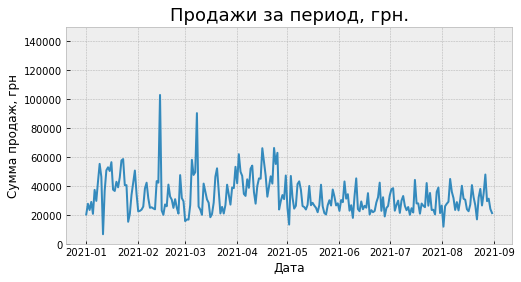

In [53]:
df_d_daily=df_d_sort.groupby(pd.Grouper(key='Время открытия', freq='1D')).sum()

fig, ax = plt.subplots(figsize = (8,4))
ax.plot(df_d_daily['Сумма со скидкой, грн.'])

ax.set_title('Продажи за период, грн.', fontdict={'size':18})
ax.set(ylabel='Сумма продаж, грн', ylim=(0, 150000))
ax.set(xlabel='Дата')

## Средний чек


In [27]:
df_d_chek=df_dostavka.groupby(df_dostavka['Номер чека']).sum()
df_d_chek

,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн."
Номер чека,,,
9,4.0,682.0,205.899778
15,2.0,860.0,294.768333
26,5.0,857.0,290.015833
29,4.0,188.0,117.591111
40,2.0,206.0,60.490000
...,...,...,...
99957,6.0,763.0,235.853750
99958,2.0,280.0,123.937500
99961,2.0,280.0,131.406667


In [28]:
df_d_chek.describe()

,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн."
count,15510.000000,15510.000000,15510.000000
mean,3.529400,520.939238,190.819614
std,2.934557,432.760809,146.500605
min,0.000000,0.000000,0.000000
25%,2.000000,260.000000,94.826250
50%,3.000000,411.000000,147.906167
75%,4.000000,692.750000,247.375625
max,42.000000,5813.000000,2124.804722


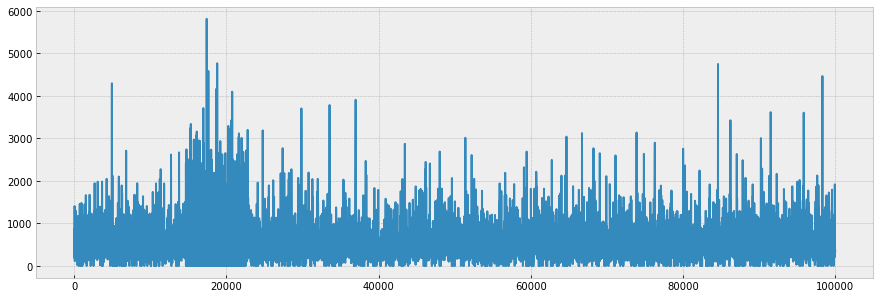

In [29]:
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(df_d_chek['Сумма со скидкой, грн.'])

[Text(0.5, 0, 'Сумма продаж')]

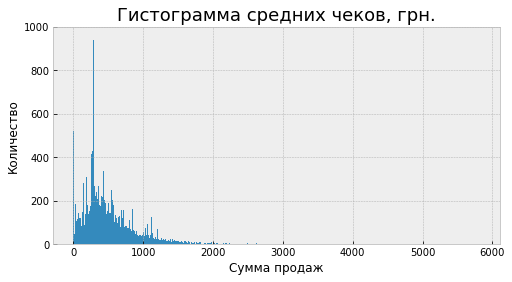

In [63]:
fig, ax = plt.subplots(figsize = (8,4))
ax.hist(df_d_chek['Сумма со скидкой, грн.'], bins = 500)

ax.set_title('Гистограмма средних чеков, грн.', fontdict={'size':18})
ax.set(ylabel='Количество', ylim=(0, 1000))
ax.set(xlabel='Сумма продаж')



<AxesSubplot:xlabel='Сумма со скидкой, грн.', ylabel='Count'>

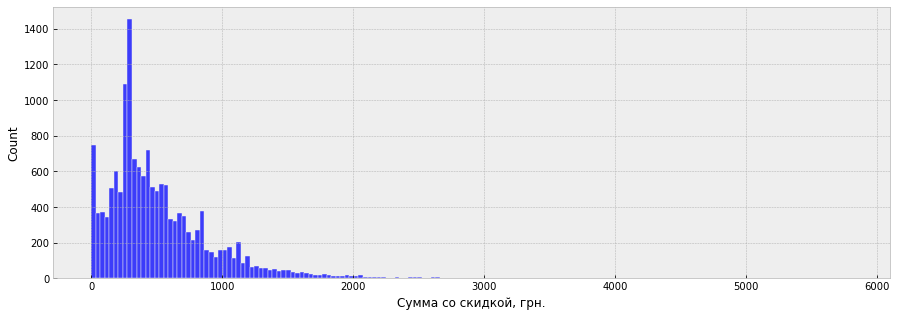

In [30]:
fig, ax = plt.subplots(figsize = (15,5))
sns.histplot(df_d_chek['Сумма со скидкой, грн.'])

### Группировка по стоимость до 100 грн за чек

In [31]:
df_d_chek_0_100=df_d_chek[(df_d_chek['Сумма со скидкой, грн.'] > 10) & (df_d_chek['Сумма со скидкой, грн.'] <= 100)]
df_d_chek_0_100['Margin'] = round( df_d_chek_0_100['Сумма со скидкой, грн.'] / df_d_chek_0_100['Себестоимость, грн.'] * 100, 2)
df_d_chek_0_100

<ipython-input-31-2210d009eec4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d_chek_0_100['Margin'] = round( df_d_chek_0_100['Сумма со скидкой, грн.'] / df_d_chek_0_100['Себестоимость, грн.'] * 100, 2)


,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн.",Margin
Номер чека,,,,
414,1.0,22.00,64.544737,34.08
424,1.0,66.00,22.156250,297.88
588,4.0,98.00,118.237333,82.88
1169,3.0,42.00,137.346667,30.58
1307,1.0,98.00,63.473333,154.40
...,...,...,...,...
97914,2.0,50.00,13.176667,379.46
98364,2.0,50.00,44.693333,111.87
98660,1.0,50.00,55.975000,89.33


### Группировка по стоимость от 100 грн до 7500 грн за чек

In [32]:
df_d_chek_100_7500=df_d_chek[(df_d_chek['Сумма со скидкой, грн.'] > 100) & (df_d_chek['Сумма со скидкой, грн.'] <= 7500)]
df_d_chek_100_7500['Margin'] = round( df_d_chek_100_7500['Сумма со скидкой, грн.'] / df_d_chek_100_7500['Себестоимость, грн.'] * 100, 2)
df_d_chek_100_7500

<ipython-input-32-8e79e5e9d365>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d_chek_100_7500['Margin'] = round( df_d_chek_100_7500['Сумма со скидкой, грн.'] / df_d_chek_100_7500['Себестоимость, грн.'] * 100, 2)


,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн.",Margin
Номер чека,,,,
9,4.0,682.0,205.899778,331.23
15,2.0,860.0,294.768333,291.75
26,5.0,857.0,290.015833,295.50
29,4.0,188.0,117.591111,159.88
40,2.0,206.0,60.490000,340.55
...,...,...,...,...
99957,6.0,763.0,235.853750,323.51
99958,2.0,280.0,123.937500,225.92
99961,2.0,280.0,131.406667,213.08


In [33]:
df_d_chek_10=df_d_chek[df_d_chek['Сумма со скидкой, грн.'] <= 10]
df_d_chek_10['Margin'] = round( df_d_chek_10['Сумма со скидкой, грн.'] / df_d_chek_10['Себестоимость, грн.'] * 100, 2)
df_d_chek_10

<ipython-input-33-0ad4fab69d21>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d_chek_10['Margin'] = round( df_d_chek_10['Сумма со скидкой, грн.'] / df_d_chek_10['Себестоимость, грн.'] * 100, 2)


,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн.",Margin
Номер чека,,,,
593,2.0,0.0,111.090000,0.0
811,6.0,0.0,150.855381,0.0
851,5.0,0.0,266.109000,0.0
903,5.0,0.0,337.069500,0.0
1037,1.0,0.0,21.750000,0.0
...,...,...,...,...
98784,5.0,0.0,230.570000,0.0
98795,3.0,0.0,29.000000,0.0
99039,3.0,0.0,93.925000,0.0


In [34]:
print('Количество чеков до 10 грн', round(len(df_d_chek_10 )/len(df_d_chek)*100, 2), '%')
print('Количество чеков от 10 до 100 грн', round(len(df_d_chek_0_100 )/len(df_d_chek)*100, 2), '%')
print('Количество чеков от 100 до 7500 грн', round(len(df_d_chek_100_7500)/len(df_d_chek)*100, 2), '%')


Количество чеков до 10 грн 3.32 %
Количество чеков от 10 до 100 грн 6.13 %
Количество чеков от 100 до 7500 грн 90.55 %


### Количество чеков до 100

C:\Users\VladV\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\VladV\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\VladV\anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, Fut

<AxesSubplot:label='b5cd9472-bfe6-44ed-bea8-080aabf05fc3', xlabel='Сумма со скидкой, грн.', ylabel='Density'>

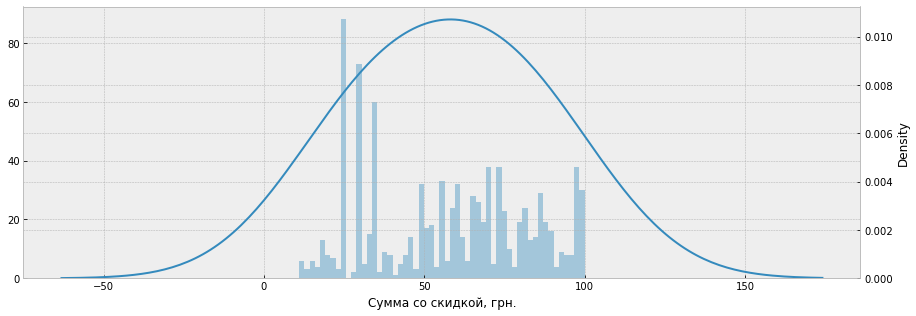

In [35]:
fig, ax1 = plt.subplots(figsize = (15,5))
ax2 = ax1.twinx()

sns.distplot(df_d_chek_0_100['Сумма со скидкой, грн.'], kde=False, ax=ax1, bins = 55)
sns.distplot(df_d_chek_0_100['Сумма со скидкой, грн.'], hist=False, ax=ax2, kde_kws={'bw':1})

<AxesSubplot:xlabel='Номер чека', ylabel='Margin'>

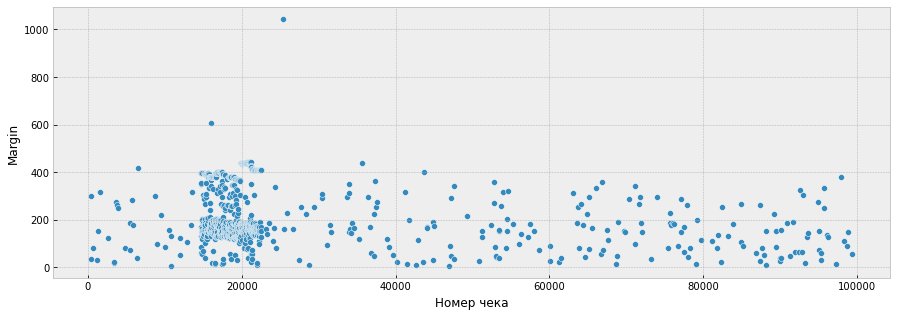

In [36]:
fig, ax = plt.subplots(figsize = (15,5))
sns.scatterplot(x=df_d_chek_0_100.index, y=df_d_chek_0_100['Margin'] )

C:\Users\VladV\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\VladV\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\VladV\anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, Fut

<AxesSubplot:label='31b38f34-fc9e-4982-a502-7be080c387ea', xlabel='Margin', ylabel='Density'>

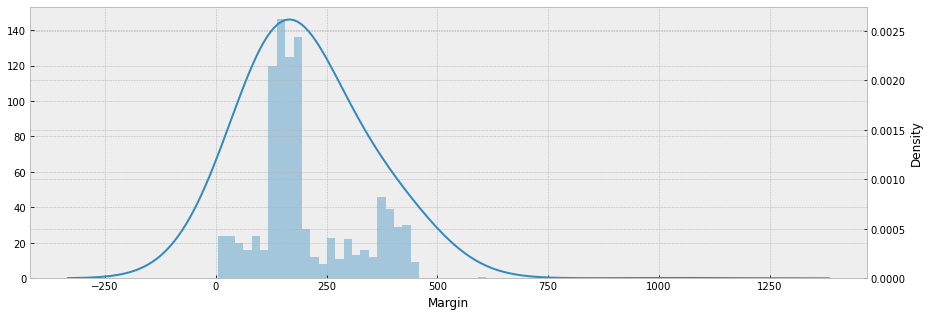

In [37]:
fig, ax1 = plt.subplots(figsize = (15,5))
ax2 = ax1.twinx()

sns.distplot(df_d_chek_0_100['Margin'], kde=False, ax=ax1, bins = 55)
sns.distplot(df_d_chek_0_100['Margin'], hist=False, ax=ax2, kde_kws={'bw':1})


### Количество чеков от 100 до 7500

C:\Users\VladV\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\VladV\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\VladV\anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, F

<AxesSubplot:label='8a4d1879-a360-411b-a689-5a28a339b7fc', xlabel='Сумма со скидкой, грн.', ylabel='Density'>

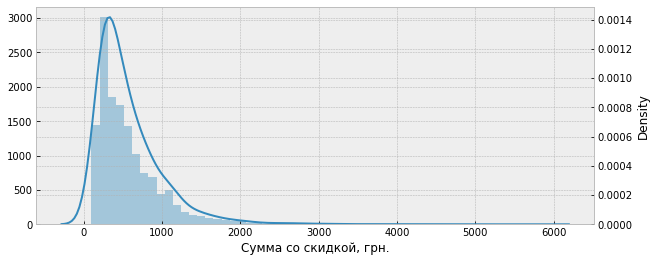

In [65]:
fig, ax1 = plt.subplots(figsize = (10,4))
ax2 = ax1.twinx()

sns.distplot(df_d_chek_100_7500['Сумма со скидкой, грн.'], kde=False, ax=ax1, bins = 55)
sns.distplot(df_d_chek_100_7500['Сумма со скидкой, грн.'], hist=False, ax=ax2, kde_kws={'bw':0.3})

<AxesSubplot:xlabel='Номер чека', ylabel='Margin'>

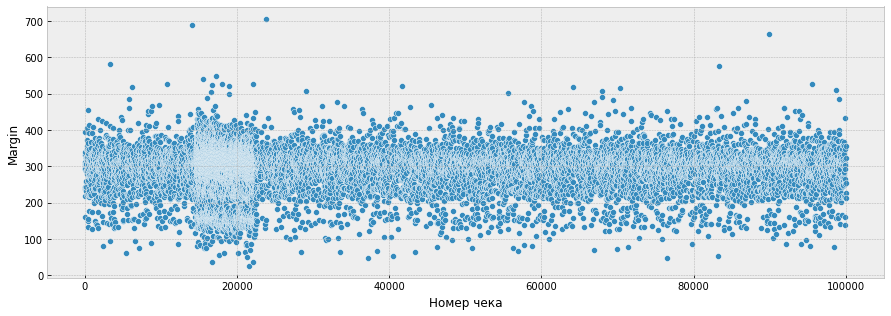

In [39]:
fig, ax = plt.subplots(figsize = (15,5))
sns.scatterplot(x=df_d_chek_100_7500.index, y=df_d_chek_100_7500['Margin'] )

C:\Users\VladV\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\VladV\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\VladV\anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, F

<AxesSubplot:label='c0da1ee9-e8ad-4208-bc71-2cf54d2fdbe2', xlabel='Margin', ylabel='Density'>

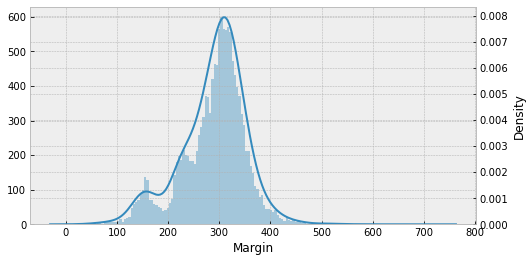

In [67]:
fig, ax1 = plt.subplots(figsize = (8,4))
ax2 = ax1.twinx()

sns.distplot(df_d_chek_100_7500['Margin'], kde=False, ax=ax1, bins = 155)
sns.distplot(df_d_chek_100_7500['Margin'], hist=False, ax=ax2, kde_kws={'bw':0.3})

### Средняя маржа по периодам

In [41]:
df_d_chek_100_7500_group_day=df_d_chek_100_7500.groupby(df_dostavka['Время открытия'].dt.day).mean()
df_chek_100_7500_group=df_d_chek_100_7500.groupby(df_dostavka['Время открытия'].dt.month).mean()

[Text(0.5, 0, 'Месяц')]

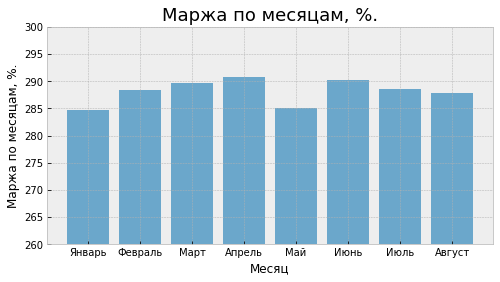

In [68]:
fig, ax = plt.subplots(figsize = (8,4))
xticks3 = ['Январь','Февраль','Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август' ]
plt.bar(df_chek_100_7500_group.index, df_chek_100_7500_group['Margin'], tick_label = xticks3, alpha=0.7, linewidth=10)
ax.set_title('Маржа по месяцам, %.', fontdict={'size':18})
ax.set(ylabel='Маржа по месяцам, %.', ylim=(260, 300))
ax.set(xlabel='Месяц')

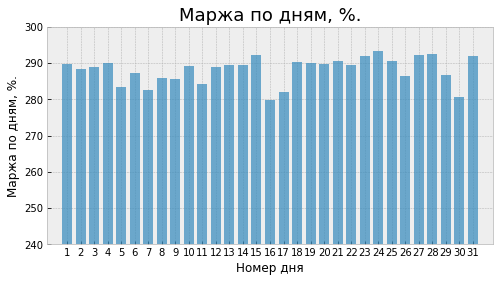

In [70]:
fig, ax = plt.subplots(figsize = (8,4))

ax.vlines(x = df_d_chek_100_7500_group_day.index, ymin = 0, ymax=df_d_chek_100_7500_group_day['Margin'], alpha=0.7, linewidth=10)

ax.set_title('Маржа по дням, %.', fontdict={'size':18})
ax.set(ylabel='Маржа по дням, %.', ylim=(240, 300))
ax.set(xlabel='Номер дня')

m_ticks = np.arange(1, 32, 1)
ax.set_xticks(m_ticks)
ax.grid(True)

### Средняя маржа по категориям

In [44]:
df_group_sort['Margin'] = round( df_group_sort['Сумма со скидкой, грн.'] / df_group_sort['Себестоимость, грн.'] * 100, 2)
df_group_sort

,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн.","Маржа, %",Margin
Категория блюда,,,,,
Роли,19714.0,2912224.97,940767.304667,309.56,309.56
Набори,2456.0,1846709.08,716085.860000,257.89,257.89
Піца,5025.0,602221.20,242339.101667,248.50,248.50
Кухня,3972.0,512202.01,182689.740000,280.37,280.37
Бізнес-ланч,3720.0,504131.56,230755.336667,218.47,218.47
Салати,3720.0,360280.46,134021.630000,268.82,268.82
Страви з рису та локшини,3205.0,316693.25,107581.820000,294.37,294.37
Супи,4054.0,285413.79,106504.232045,267.98,267.98
Бургери,1257.0,199553.49,75035.820000,265.94,265.94


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

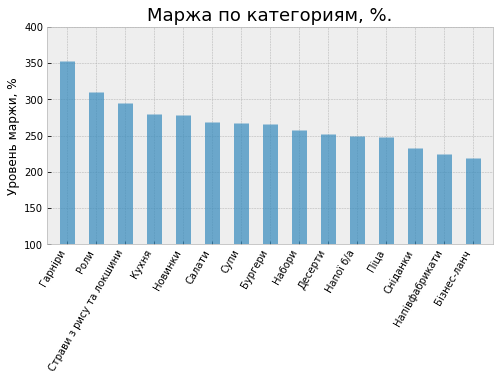

In [71]:
fig, ax = plt.subplots(figsize = (8,4))

df_group_sort_2=df_group_sort.sort_values('Margin', ascending=[False])

ax.vlines(x=df_group_sort_2.index, ymin = 0, ymax=df_group_sort_2['Margin'], alpha=0.7, linewidth=15 )

ax.set_title('Маржа по категориям, %.', fontdict={'size':18})
ax.set(ylabel='Уровень маржи, %', ylim=(100, 400))
plt.xticks( rotation=60, horizontalalignment='right')

In [46]:
df_d_chek_group = df_dostavka.groupby(['Номер чека']).sum()
df_d_chek_group['Margin'] = round(df_d_chek_group['Сумма со скидкой, грн.'] / df_d_chek_group['Себестоимость, грн.'] * 100, 2)
df_d_chek_group['hour'] = df_dostavka['Время открытия'].dt.hour
df_d_chek_group 

,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн.",Margin,hour
Номер чека,,,,,
9,4.0,682.0,205.899778,331.23,11.0
15,2.0,860.0,294.768333,291.75,13.0
26,5.0,857.0,290.015833,295.50,13.0
29,4.0,188.0,117.591111,159.88,15.0
40,2.0,206.0,60.490000,340.55,11.0
...,...,...,...,...,...
99957,6.0,763.0,235.853750,323.51,NaN
99958,2.0,280.0,123.937500,225.92,NaN
99961,2.0,280.0,131.406667,213.08,NaN


Text(0.5, 1.0, 'Разброс маржи по часам')

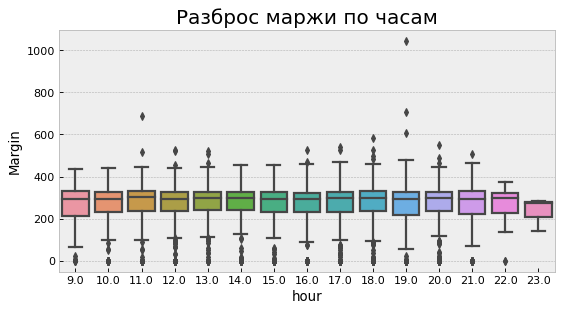

In [73]:
fig, ax = plt.subplots(figsize = (8,4), dpi= 80)
sns.boxplot(x = 'hour', y = 'Margin', data = df_d_chek_group)
ax.set_title('Разброс маржи по часам', fontdict={'size':18})

In [72]:
df_d_chek_group

,Количество блюд,"Сумма со скидкой, грн.","Себестоимость, грн.",Margin,hour
Номер чека,,,,,
9,4.0,682.0,205.899778,331.23,11.0
15,2.0,860.0,294.768333,291.75,13.0
26,5.0,857.0,290.015833,295.50,13.0
29,4.0,188.0,117.591111,159.88,15.0
40,2.0,206.0,60.490000,340.55,11.0
...,...,...,...,...,...
99957,6.0,763.0,235.853750,323.51,NaN
99958,2.0,280.0,123.937500,225.92,NaN
99961,2.0,280.0,131.406667,213.08,NaN
